In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
plt.rc('text', usetex=True)
plt.rc('font', family='Serif')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['font.size'] = 27

mpl.rcParams['savefig.dpi'] = 150 
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10 
mpl.rcParams['xtick.minor.size'] = 5 

mpl.rcParams['ytick.major.size'] = 10 
mpl.rcParams['ytick.minor.size'] = 5 

mpl.rcParams['xtick.labelsize'] = 23
mpl.rcParams['ytick.labelsize'] = 23

In [2]:
M55_path = os.getcwd()

In [3]:
df1 = pd.read_csv("{}/M55.dat".format(M55_path),sep='\s+')
df2 = pd.read_csv("{}/M55artstars.dat".format(M55_path),sep='\s+')

In [8]:
epsilon = 1
V_diff = []
I_diff = []
obs_x = df1['x'].values
obs_y = df1['y'].values
obs_V = df1['Vvega'].values
obs_I = df1['Ivega'].values
as_x = df2['#InputX'].values
as_y = df2['InputY'].values
as_V = df2['InputF606W'].values
as_I = df2['InputF814W'].values

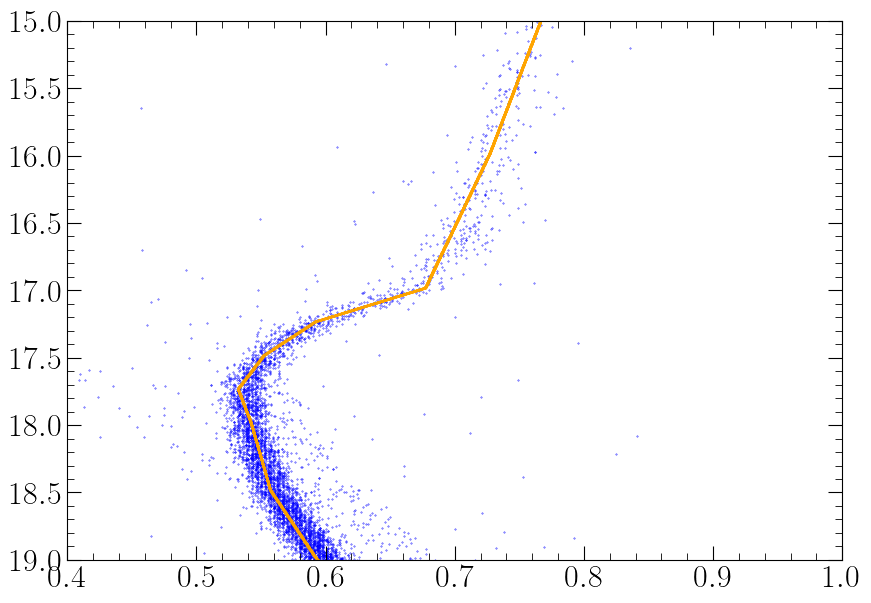

In [11]:
plt.scatter(obs_V-obs_I,obs_V,s=0.1,c='b')
V_diff=30.98
VI_diff=0.737
plt.scatter(as_V-as_I+VI_diff,as_V + V_diff,s=0.1,c='orange',alpha=0.5)
plt.ylim(15,19)
plt.xlim(0.4,1)
plt.gca().invert_yaxis()

V_diff = 30.98
I_diff = 30.243000000000002


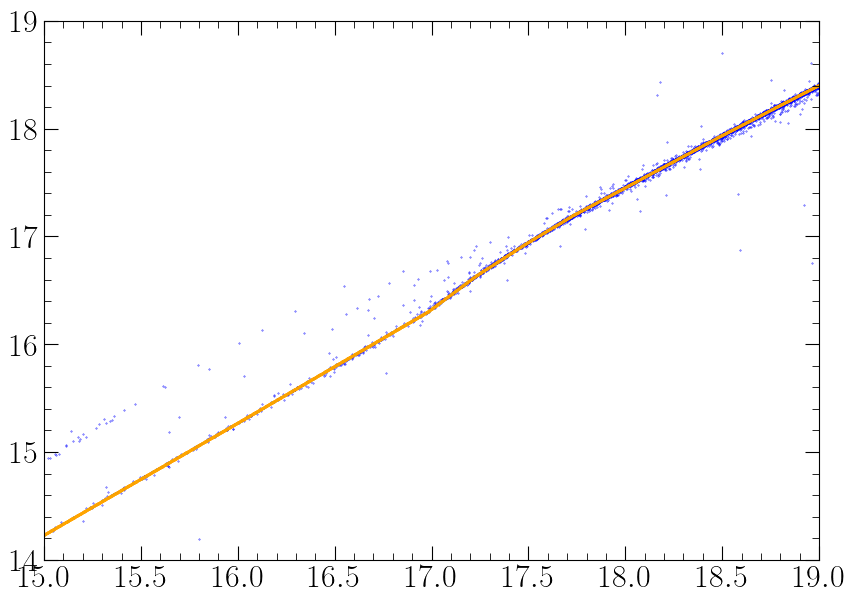

In [12]:
plt.scatter(obs_V,obs_I,s=0.1,c='b')
V_diff=30.98
I_diff = V_diff-0.737
#VI_diff=0.737
plt.scatter(as_V+V_diff,as_I+I_diff,s=0.1,c='orange',alpha=0.5)
plt.xlim(15,19)
plt.ylim(14,19)
print("V_diff = {}".format(V_diff))
print("I_diff = {}".format(I_diff))

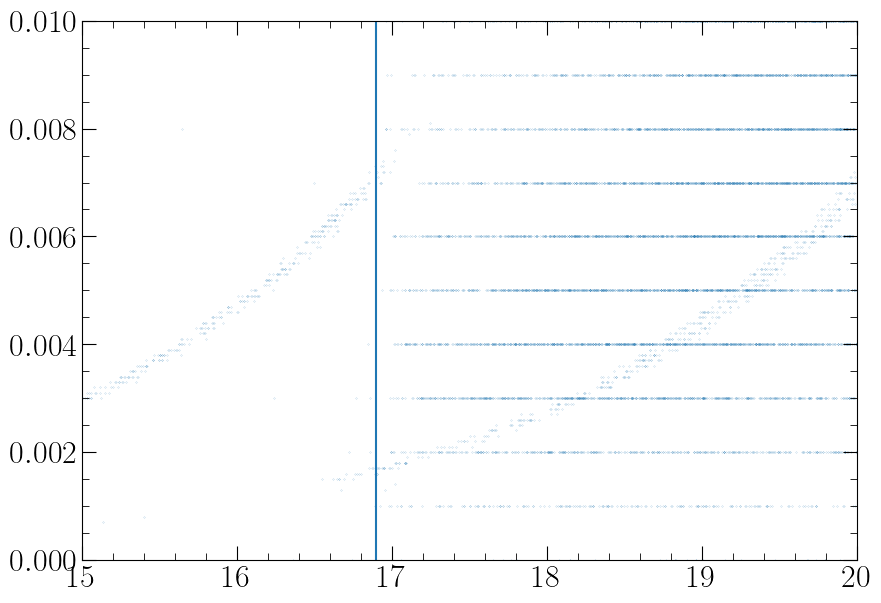

In [24]:
plt.scatter(df1['Vvega'],df1['err'],s=0.01)
plt.ylim(0,0.01)
plt.xlim(15,20)
V_long_short = 16.9
plt.axvline(x=V_long_short)

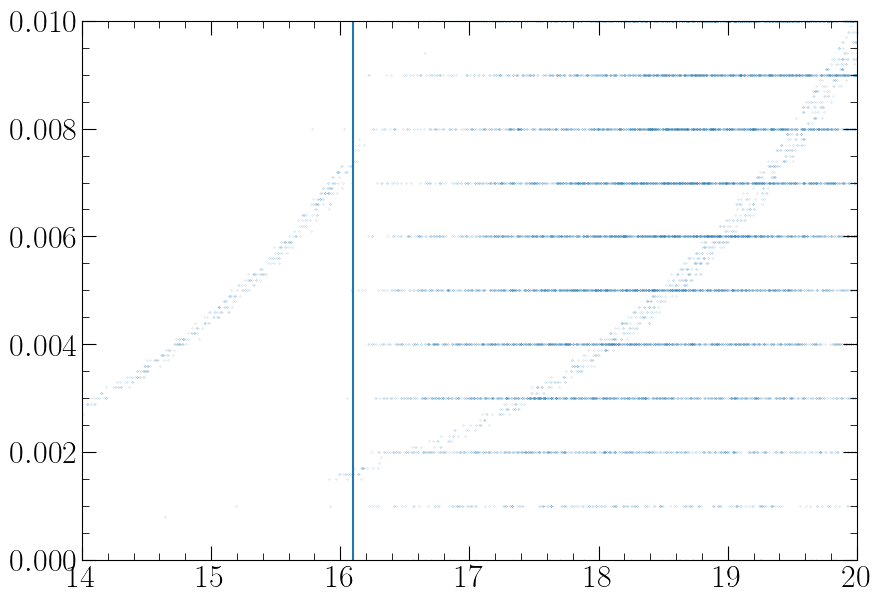

In [30]:
plt.scatter(df1['Ivega'],df1['err.2'],s=0.01)
plt.ylim(0,0.01)
plt.xlim(14,20)
I_long_short = 16.1
plt.axvline(x=I_long_short)

In [14]:
M55_fitstars = pd.read_csv("{}/M55_fitstars.dat".format(M55_path),sep=',')

In [31]:
print("V_max for AS test is: {}".format(max(M55_fitstars['v'].values) - V_diff))
print("V_min for AS test is: {}".format(min(M55_fitstars['v'].values) - V_diff))
print("I_max for AS test is: {}".format(max(M55_fitstars['i'].values) - I_diff))
print("I_min for AS test is: {}".format(min(M55_fitstars['i'].values) - I_diff))
print("VI_max for AS test is: {}".format(max(M55_fitstars['vi'].values)- V_diff + I_diff))
print("VI_min for AS test is: {}".format(min(M55_fitstars['vi'].values)- V_diff + I_diff))
print("V_short_long for AS test is: {}".format(V_long_short - V_diff))
print("I_short_long for AS test is: {}".format(I_long_short - I_diff))

V_max for AS test is: -10.201
V_min for AS test is: -17.183
I_max for AS test is: -10.214000000000002
I_min for AS test is: -17.220000000000002
VI_max for AS test is: 0.17900000000000205
VI_min for AS test is: -0.27399999999999736
V_short_long for AS test is: -14.080000000000002
I_short_long for AS test is: -14.143
